# GRIP PROGRAM -SPARK FOUNDATION

# IOT AND COMPUTER VISION -TASK2

# Color Identification in Images 

In some applications they also need to be able to identify the colors. A number of visual and cognitive factors affect discriminability and identifiability of colors. Under some conditions the number of usable colors may run into the thousands. In others the number may be on the order of six, with several having restricted meanings.

This is an implementation of detecting multiple colors (here, only red, green and blue colors have been considered) in real-time using Python programming language

# COLOR CODE:

The color red, the color code is #FF0000, which is '255' red, '0' green, and '0' blue. These color codes can be used to change the color of the background, text, and tables on a web page. Major hexadecimal color codes

# CONCEPT USED IN THIS PROJECT 

In this project  I have used machine learning algorithm, KMeans, to extract colors from a give image. I will use OpenCV2 for image manipulation, apply KMeans to identify the major colors and then plot the information using Matplotlib.The main thing noted here is to provide some useful tips in this pandemic regrading covid .Based on the Colors,the fruits and vegtables which gives immunity and stay oxygenated  are suggested.

# STEP 1:IMPORT LIBRARIES

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

# STEP 2: SIZE,DATATYPE,SHAPE OF IMAGE

The type of this input is <class 'numpy.ndarray'>
Shape: (170, 726, 3)


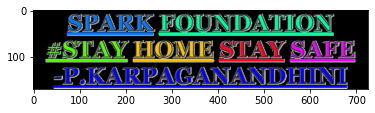

In [3]:
image = cv2.imread('sample3.png')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

# MODE OF THE IMAGE

In [4]:
from PIL import Image
im = Image.open("sample3.png")
print (im.mode)

RGBA


# HISTOGRAM OF THE ORIGINAL IMAGE

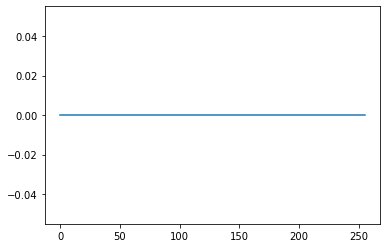

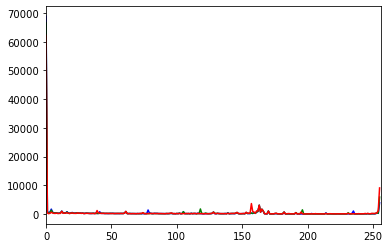

In [5]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('sample2.png',0)
histr = cv2.calcHist([img],[0],None,[256],[0,256])
plt.plot(histr)
plt.show()

import cv2 
import matplotlib.pyplot as plt 
   
img_bgr = cv2.imread('sample3.png', 1) 
   
color = ('b', 'g', 'r') 
  
for i, col in enumerate(color): 
    histr = cv2.calcHist([img_bgr], [i], None, [256], [0, 256]) 
    plt.plot(histr, color = col) 
    plt.xlim([0, 256]) 
      
plt.show() 

# STEP 3:OPEN CV

OpenCV is a library of programming functions mainly aimed at real-time computer vision. Originally developed by Intel, it was later supported by Willow Garage then Itseez. The library is cross-platform and free for use under the open-source Apache 2 License.

We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.

# BGR TO RGB

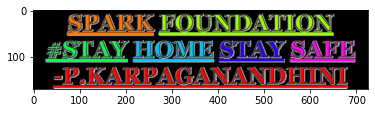

In [6]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

# GRAY SCALE IMAGE

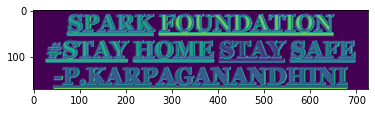

In [7]:
import cv2
%matplotlib inline
import matplotlib
from matplotlib import*
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance 
image = cv2.imread('sample3.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2.imshow('Original image',image)
cv2.imshow('Gray image', gray)
img2 = cv2.imread('sample3.png',2)
ret, bw_img = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)
cv2.imshow("Binary Image",bw_img)
pyplot.imshow(image)
pyplot.imshow(bw_img)
pyplot.imshow(gray)

# RESIZE THE IMAGE

Original Dimensions :  (170, 726, 4)
Resized Dimensions :  (450, 350, 4)


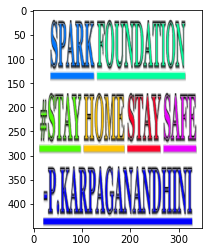

In [8]:
import cv2
%matplotlib inline
import matplotlib
from matplotlib import*
import matplotlib.pyplot as plt
img = cv2.imread('sample3.png', cv2.IMREAD_UNCHANGED)
print('Original Dimensions : ',img.shape)
width = 350
height = 450
dim = (width, height)
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
print('Resized Dimensions : ',resized.shape)
cv2.imshow("Orginal image",img)
cv2.imshow("Resized image", resized)
cv2.waitKey(0)
pyplot.imshow(resized)

# STEP 4:COLOR IDENTIFICATION 

Define a function that can give us the hex values of our the colors that we will identify.

In [9]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

KMeans expects flattened array as input during its fit method. Thus, we need to reshape the image using numpy. Then, we can apply KMeans to first fit and then predict on the image to get the results. Then, the cluster colors are identified an arranged in the correct order. We plot the colors as a pie chart.

In [10]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [11]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

# STEP5:COLORS IN PIECHART

[array([243.13526093,  35.07804419,   8.05293841]),
 array([2.47478866, 2.39060851, 2.15866582]),
 array([161.00260225, 157.15042145, 155.9118063 ]),
 array([154.16633426, 244.02712405,   9.85859593]),
 array([78.32212877, 71.28698578, 66.4209818 ]),
 array([ 13.62940101, 238.67055327,  82.24645633]),
 array([ 26.64897817, 114.00708314, 241.31525778]),
 array([243.27432886,  12.25475391, 225.1795302 ])]

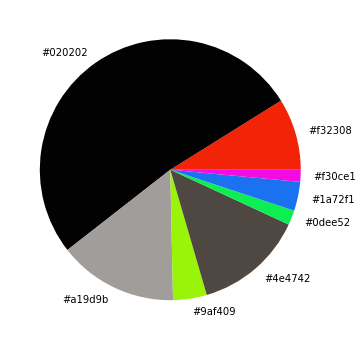

In [12]:
get_colors(get_image('sample3.png'), 8, True)

# STEP 6: SEARCH IMAGE USING COLORS

From the model above, we can extract the major colors. This create the opportunity to search for images based on certain colors. We can select a color and if it's hex matches or is close to the hex of the major colors of the image, we say it's a match.
First get all the images and store them in the images folder.

In [13]:
IMAGE_DIRECTORY = 'images'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

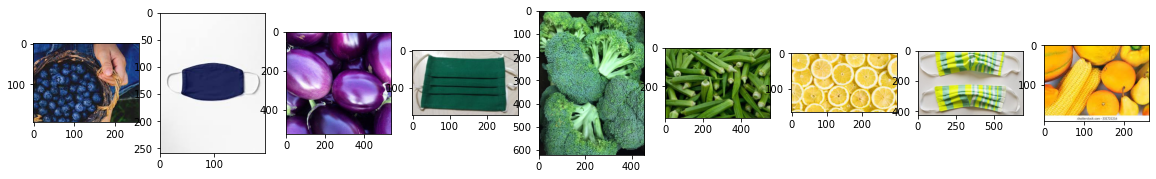

In [14]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

# STEP 7:COLOR MATCHING

We define the function below. We will try to match with the top 10 colors of the image. It is highly possible that there will be no extact match for the hex codes, thus we calculate the similarity between the chosen color and the colors of the image.

We keep a threshold value such that if the difference between the chosen color and any of the selected colors is less than that threshold, we declare it as a match.

Hex values or RGB values cannot be directly compared so we first convert them to a device independant and color uniform space. We use rgb2lab to convert the values and then find the difference using deltaE_cie76. The method calculates the difference between all top 5 colors of the image and the selected color and if atleast one is below the threshold, we show the image.

In [15]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [16]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

# SUGGESTION FOR IMMUNITY FOOD BASED ON COLORS

# GREEN COLOR - SUGGESTS  MASK,BROCOLLI,LADYSFINGER

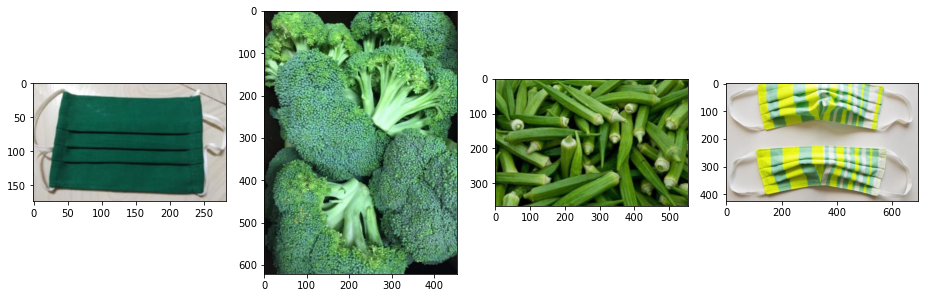

In [17]:
# Search for GREEN
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 10)

# BLUE COLOR - SUGGESTS MASK,BLUEBERRIES,EGGPLANT

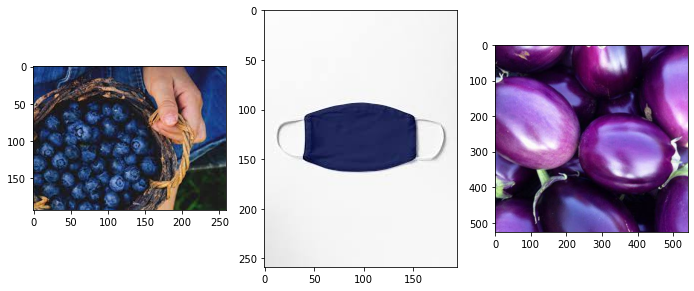

In [18]:
# Search for BLUE
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

# YELLOW COLOR SUGGESTS MASK AND CITRUS FRUITS VEGTABLES

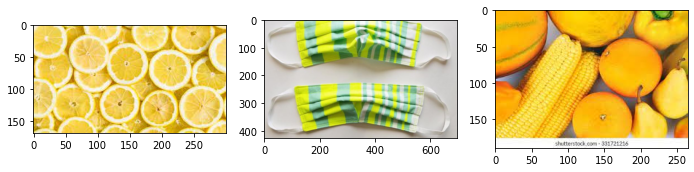

In [19]:
# Search for YELLOW
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

# CONCLUSION

Thus the detection of colors in a image and some manipulation in a image is done and verified with the output.Another important suggestion for immunity foods ,fruits and vegtables based on the colors was done successfully and verified.